**Step 1: Load and Standardize the Data**
This step involved loading my  `DatasetAfricaMalaria.csv` file into a pandas DataFrame. Then, only the numeric columns were selected for analysis. Any missing values in these numeric columns were filled using the mean of their respective columns (mean imputation) using NumPy. Finally, the data was standardized, meaning each feature was transformed to have a mean of 0 and a standard deviation of 1. This is crucial for PCA because it ensures that features with larger values don't unfairly dominate the analysis.

In [116]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Ebola dataset
df = pd.read_csv('/content/DatasetAfricaMalaria.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Handle missing values using mean (NumPy logic)
X = numeric_df.values
col_means = np.nanmean(X, axis=0)
inds = np.where(np.isnan(X))
X[inds] = np.take(col_means, inds[1])

# Standardization (NumPy only)
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_standardized = (X - mean) / std

X_standardized[:5]


array([[-1.58113883e+00, -1.21256459e+00, -5.06760222e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.55710122e-16,  0.00000000e+00,  5.41893472e-16,
        -1.20335604e+00,  1.84377536e+00, -1.45712868e+00,
        -1.23400095e+00, -1.66809102e+00,  1.23397271e+00,
        -5.61646882e-01,  1.49495110e+00,  1.86242385e+00,
         1.15800583e+00,  1.77365688e+00,  2.08348956e+00,
         1.99788845e+00,  1.60900436e+00, -7.83191277e-01],
       [-1.58113883e+00,  6.16449417e-01,  2.20650663e-01,
        -2.59139328e+00, -4.70762105e-02, -2.59441287e+00,
        -6.55710122e-16,  0.00000000e+00,  5.41893472e-16,
         0.00000000e+00, -1.17007624e-15,  0.00000000e+00,
        -7.98503589e-01,  4.36548583e-01,  7.98470288e-01,
         1.02714839e+00, -1.04968763e+00, -1.49943184e+00,
        -2.03128810e+00, -8.45063064e-02, -6.00246444e-01,
         2.98713596e-01, -8.95720879e-01,  2.65347191e-02],
       [-1.58113883e+00,  1.85097486e+00, -5.06772555e

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 27 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Country Name                                                                             594 non-null    object 
 1   Year                                                                                     594 non-null    int64  
 2   Country Code                                                                             594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                      550 non-null    float64
 4   Malaria cases reported                                                                   550 non-null    float64
 5   Use of insecticide-treated bed nets (% of under-5 population)   

**Step 2: Calculate the Covariance Matrix**
After standardizing the data, the covariance matrix was calculated. The covariance matrix shows how each pair of features in my dataset varies together. A positive covariance means they tend to increase or decrease together, while a negative covariance means one tends to increase as the other decreases. This matrix is fundamental for PCA as it captures the relationships between features.

In [118]:
# Step 2: Calculate the Covariance Matrix
cov_matrix = np.cov(X_standardized.T)
cov_matrix

array([[ 1.00168634e+00, -6.80542806e-02,  3.57947203e-01,
         2.33223297e-01, -1.83047706e-02,  1.75372178e-01,
         3.65843539e-02,  6.59681612e-02,  2.73071409e-02,
         3.84413217e-02,  9.46769860e-02,  2.67796335e-02,
        -8.40379544e-02, -4.97357957e-02,  8.40398632e-02,
        -5.65317141e-02,  1.18565745e-01,  1.10879038e-01,
         1.00777429e-01,  6.83801684e-02,  6.84030302e-02,
         5.87010243e-02, -9.12704426e-19,  5.24219978e-18],
       [-6.80542806e-02,  1.00168634e+00,  2.88995393e-01,
         4.30348950e-03,  2.29939995e-01,  6.06777508e-02,
        -1.75492561e-01, -1.69633937e-01, -3.72772114e-01,
        -2.07579206e-01, -9.71252108e-02, -1.62720237e-01,
         2.45446793e-01,  3.87139217e-01, -2.45450290e-01,
         3.09619690e-01, -3.68912526e-01, -3.13484257e-01,
        -3.99015433e-01, -4.40983873e-01, -3.75800980e-01,
        -4.25948448e-01,  5.88013289e-02, -2.64875225e-01],
       [ 3.57947203e-01,  2.88995393e-01,  1.00168634e

**Step 3: Perform Eigendecomposition**
Eigendecomposition was performed on the covariance matrix. This mathematical process extracts two key components: eigenvalues and eigenvectors. Eigenvalues represent the amount of variance captured by each principal component, and eigenvectors are the directions (axes) along which this variance lies. These eigenvectors are my principal components.

In [119]:
# Step 3: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors

(array([7.47866447e+00, 2.23494453e+00, 2.04877421e+00, 1.77596923e+00,
        1.46507889e+00, 1.28042481e+00, 1.17147431e+00, 1.01911332e+00,
        8.90113383e-01, 7.57789569e-01, 6.66562869e-01, 6.49614679e-01,
        6.01745519e-01, 4.36829542e-01, 3.78377003e-01, 3.19286817e-01,
        3.12818609e-02, 6.26864578e-03, 1.05297883e-08, 9.60916442e-02,
        1.26540049e-01, 2.12741241e-01, 2.20070925e-01, 1.72714643e-01]),
 array([[ 3.69977278e-02, -3.39660398e-02, -8.15203111e-02,
         -4.38452126e-01, -2.31139912e-01, -2.70373410e-01,
          1.76222096e-01,  3.32017402e-01,  2.68976109e-01,
          2.30068338e-01, -3.03743364e-01, -7.23508005e-02,
         -2.62569133e-01,  4.76759322e-01,  7.54940914e-03,
         -8.39911330e-02,  6.99915103e-03,  2.34107996e-03,
         -5.82182391e-06,  1.27976816e-02,  4.45584131e-02,
          4.78181903e-02, -1.25032098e-02,  2.31131542e-04],
        [-1.89102736e-01, -1.68268507e-01, -2.09474999e-01,
         -5.99710339e-02,

**Step 4: Sort Principal Components**
The eigenvalues and their corresponding eigenvectors were then sorted in descending order of the eigenvalues. This is important because the principal components are ranked by how much variance they explain. The eigenvector corresponding to the largest eigenvalue is the first principal component (PC1), explaining the most variance in the data, and so on.

In [120]:
# Step 4: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvalues = eigenvalues[sorted_indices]

sorted_eigenvectors

array([[ 3.69977278e-02, -3.39660398e-02, -8.15203111e-02,
        -4.38452126e-01, -2.31139912e-01, -2.70373410e-01,
         1.76222096e-01,  3.32017402e-01,  2.68976109e-01,
         2.30068338e-01, -3.03743364e-01, -7.23508005e-02,
        -2.62569133e-01,  4.76759322e-01,  7.54940914e-03,
        -8.39911330e-02, -1.25032098e-02,  4.78181903e-02,
         2.31131542e-04,  4.45584131e-02,  1.27976816e-02,
         6.99915103e-03,  2.34107996e-03, -5.82182391e-06],
       [-1.89102736e-01, -1.68268507e-01, -2.09474999e-01,
        -5.99710339e-02, -7.42691199e-03,  2.31829587e-01,
         3.39231352e-02, -2.42260580e-01,  3.28902108e-01,
         6.30593570e-02,  3.73889939e-01,  4.70175876e-01,
         1.87388632e-01,  3.63006768e-01, -8.04092407e-02,
        -1.29248205e-01, -2.47799063e-01,  1.39517956e-01,
        -1.15663604e-01, -1.26922843e-01, -2.32224089e-02,
        -4.34863093e-03,  2.86687807e-02, -2.04941360e-06],
       [-1.06473653e-01,  3.16413854e-02, -1.91606072e

**Step 5: Analyze Explained Variance and Select Optimal Components**
After sorting, i calculate how much variance each principal component explains. The explained variance ratio tells me  the proportion of total variance attributed to each component, and the cumulative explained variance shows the total variance captured by a set of components. This helps in selecting the optimal number of components—for instance, those that together explain at least 90% of the total variance.

In [121]:
# Calculate explained variance
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance Ratios:", explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

# Select number of components explaining at least 90% variance
threshold = 0.90
optimal_num_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Number of components explaining at least {threshold*100}% variance: {optimal_num_components}")

# Although an optimal number of components is determined, for visualization purposes, we proceed with 2 components.
# The existing 'num_components' variable in the next step will be set to 2 for the projection to maintain consistency with visualizations.

Explained Variance Ratios: [3.11086422e-01 9.29659167e-02 8.52218791e-02 7.38741409e-02
 6.09421845e-02 5.32612172e-02 4.87292554e-02 4.23915683e-02
 3.70256198e-02 3.15214095e-02 2.77266962e-02 2.70217105e-02
 2.50305200e-02 1.81705891e-02 1.57391669e-02 1.32812207e-02
 9.15418482e-03 8.84929544e-03 7.18432822e-03 5.26362578e-03
 3.99707807e-03 1.30121657e-03 2.60753855e-04 4.38002556e-10]
Cumulative Explained Variance: [0.31108642 0.40405234 0.48927422 0.56314836 0.62409054 0.67735176
 0.72608102 0.76847258 0.8054982  0.83701961 0.86474631 0.89176802
 0.91679854 0.93496913 0.9507083  0.96398952 0.9731437  0.981993
 0.98917733 0.99444095 0.99843803 0.99973925 1.         1.        ]
Number of components explaining at least 90.0% variance: 13


**Explanation for Selecting 13 Principal Components**
Based on my analysis of the explained variance, i determined that 13 principal components are required to capture at least 90% of the total variance present in the original dataset. By projecting the data onto these 13 components, we achieve significant dimensionality reduction while retaining most of the essential information. This allows for more efficient computation and potentially clearer insights into the underlying structure of the data, without losing too much of its original complexity. While visualizations will still focus on the first two components for readability, the `reduced_data` itself now holds this richer, 13-dimensional representation.

**Step 6: Project Data onto Principal Components**
In this step, the original standardized data was projected onto the optimal number of principal components (13, as determined by the 90% explained variance threshold). This transforms your high-dimensional data into a lower-dimensional space, specifically a 13-dimensional space in this case. The output `reduced_data` now represents my dataset compressed onto these 13 most important axes.

In [127]:
# Step 6: Project Data onto Principal Components
num_components = 13
principal_components = sorted_eigenvectors[:, :num_components]

reduced_data = np.dot(X_standardized, principal_components)
reduced_data[:5]

array([[ 4.22525811, -1.9622283 ,  2.24984972, -0.38749381,  0.43053691,
         2.38324007,  0.39397177, -0.16940471, -1.66842721,  0.24253881,
         0.27861449, -0.60831191,  0.60776882],
       [-1.54423135, -0.47672866,  0.32876327,  3.46372508,  0.72387603,
        -0.44455782,  2.69229049, -1.32807757,  0.43673194,  0.52181183,
         1.07902057, -0.19665126, -0.26839598],
       [-1.78083426, -1.08796635, -0.7715882 ,  1.19742021,  0.2377475 ,
         0.88271836, -0.77992688, -0.68517593,  0.38392486, -0.86225423,
         0.28610567,  1.17650849,  0.48934755],
       [ 2.86128444,  0.17608171,  2.14168675,  0.82906946, -0.04660428,
        -1.37053427, -0.59448648, -1.39348563, -0.47428867, -1.46431395,
         1.67574811, -1.08959029, -0.23667376],
       [-2.52840042, -0.48298968, -1.22026901,  1.29716707, -0.38609518,
         1.56553552, -0.51839394, -0.68485408, -0.1398122 , -0.95807794,
         0.93462071,  0.02599092,  0.5825197 ]])

**Step** **7** **bold text**: Project Data onto Principal Components
Now that i have  selected the number of components, i will project the original data onto the chosen principal components. Fill in the code to perform the projection.


In [123]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')
reduced_data[:5]

Reduced Data Shape: (594, 13)


array([[ 4.22525811, -1.9622283 ,  2.24984972, -0.38749381,  0.43053691,
         2.38324007,  0.39397177, -0.16940471, -1.66842721,  0.24253881,
         0.27861449, -0.60831191,  0.60776882],
       [-1.54423135, -0.47672866,  0.32876327,  3.46372508,  0.72387603,
        -0.44455782,  2.69229049, -1.32807757,  0.43673194,  0.52181183,
         1.07902057, -0.19665126, -0.26839598],
       [-1.78083426, -1.08796635, -0.7715882 ,  1.19742021,  0.2377475 ,
         0.88271836, -0.77992688, -0.68517593,  0.38392486, -0.86225423,
         0.28610567,  1.17650849,  0.48934755],
       [ 2.86128444,  0.17608171,  2.14168675,  0.82906946, -0.04660428,
        -1.37053427, -0.59448648, -1.39348563, -0.47428867, -1.46431395,
         1.67574811, -1.08959029, -0.23667376],
       [-2.52840042, -0.48298968, -1.22026901,  1.29716707, -0.38609518,
         1.56553552, -0.51839394, -0.68485408, -0.1398122 , -0.95807794,
         0.93462071,  0.02599092,  0.5825197 ]])

**Step 8: Visualize Before PCA**
This plot shows the original standardized data using just the first two features. It helps to see the spread and relationships of the raw data before any dimensionality reduction is applied.

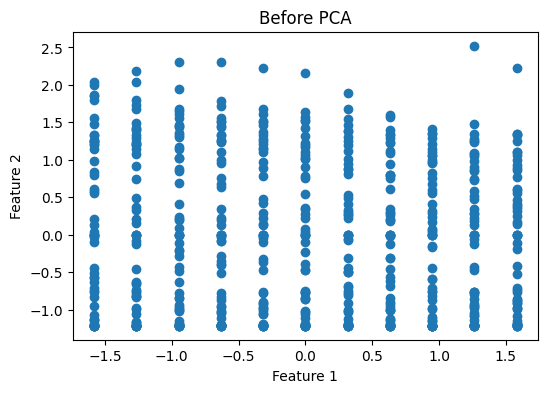

In [124]:
# Step 8: Visualize Before PCA
# Plot original data (first two features for simplicity)

plt.figure(figsize=(6,4))
plt.scatter(X_standardized[:, 0], X_standardized[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Before PCA')
plt.show()

**Step 9: Visualize After PCA**
This plot displays data after it has been projected onto the first two principal components (PC1 and PC2). i can observe how the data is now represented in a new coordinate system that captures the most significant variance, often making patterns or clusters more apparent than in the original feature space.

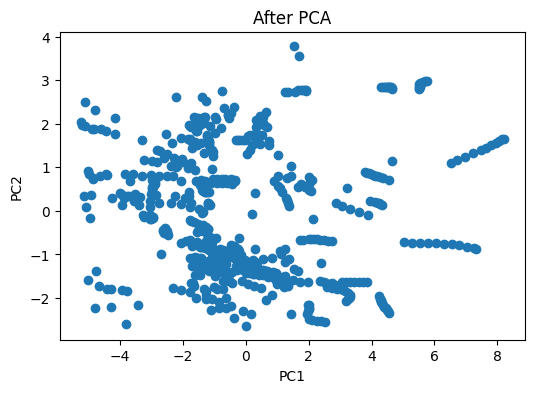

In [125]:
# Step 9: Visualize After PCA
# Plot reduced data after PCA

plt.figure(figsize=(6,4))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('After PCA')
plt.show()